# 0. Can we predict the outcome of an NBA game using historic game data?

## Machine Learning Project
This notebook contains the preliminary EDA for the project. 

## Introduction and Planning
Sports betting is becoming more and more popular with the rise of smartphone apps like DraftKings, FanDuel, and more. These platforms have revolutionized the ways users engage with sports betting with convenience and accessibility across different spots from PGA, to college football. As this industry grows along with its user base, its lucrativeness is entering the main spotlight. 

The lucrativeness of sports betting is evident by the rise of social media influencers demonstrating their ability to generate high returns from both traditional betting and digital platforms. Sports betting has drawn the attention of data analysts and machine learning engineers, particularly with the rise of AI. By leveraging historic data, data analysts and scientists alike can build prediction models can enhance user experience and provide recommendations.

In this project, I aim to build a prediction model using historic NBA game data to predict the outcome given two teams. The goal is the model to compute the weighted offensive and defensive attributes of each respective team using historic game data and return the predicted scores of each team. 

## Data Source
This preliminary analysis uses open source data from Kaggle. 
* This dataset contains comprehensive information regarding NBA teams, including players, game scores, historic team scores, coaches, and more.
* In this analysis, team data was queried using SQLite. Team data was joined using three tables: `game`, `other_stats` and `line_score`. 
    

# 1. Import dependencies for EDA

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt

In [10]:
# Read in data
df_team_data = pd.read_csv('Resources/team_data_query1.csv')
df_team_data

,#,season_id,game_id,game_date,team_id_home,team_name_home,ftm_home,fta_home,ft_pct_home,oreb_home,...,pts_ot1_away,pts_ot2_away,pts_ot3_away,pts_ot4_away,pts_ot5_away,pts_ot6_away,pts_ot7_away,pts_ot8_away,pts_ot9_away,pts_ot10_away
0,1,21999,29900423,2000-01-02 00:00:00,1610612748,Miami Heat,27,32,0.844,12,...,15.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,21999,29900427,2000-01-03 00:00:00,1610612753,Orlando Magic,21,31,0.677,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,21999,29900426,2000-01-03 00:00:00,1610612764,Washington Wizards,14,18,0.778,15,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,21999,29900429,2000-01-03 00:00:00,1610612762,Utah Jazz,16,20,0.800,12,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,21999,29900428,2000-01-03 00:00:00,1610612741,Chicago Bulls,9,17,0.529,16,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,30484,32022,32200001,2023-02-19 00:00:00,1610616834,Team LeBron,0,0,NaN,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30484,30485,32022,32200001,2023-02-19 00:00:00,1610616834,Team LeBron,0,0,NaN,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30485,30486,32022,32200001,2023-02-19 00:00:00,1610616834,Team LeBron,0,0,NaN,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30486,30487,32022,32200001,2023-02-19 00:00:00,1610616834,Team LeBron,0,0,NaN,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2. Preliminary Exploration and Preparation

In [11]:
# Preliminary exploration
df_team_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30488 entries, 0 to 30487
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   #                  30488 non-null  int64  
 1   season_id          30488 non-null  int64  
 2   game_id            30488 non-null  int64  
 3   game_date          30488 non-null  object 
 4   team_id_home       30488 non-null  int64  
 5   team_name_home     30488 non-null  object 
 6   ftm_home           30488 non-null  int64  
 7   fta_home           30488 non-null  int64  
 8   ft_pct_home        30480 non-null  float64
 9   oreb_home          30488 non-null  int64  
 10  reb_home           30488 non-null  int64  
 11  ast_home           30488 non-null  int64  
 12  stl_home           30488 non-null  int64  
 13  blk_home           30488 non-null  int64  
 14  tov_home           30488 non-null  int64  
 15  pf_home            30488 non-null  int64  
 16  team_id_away       304

In [12]:
df_team_data.describe()

,#,season_id,game_id,team_id_home,ftm_home,fta_home,ft_pct_home,oreb_home,reb_home,ast_home,...,pts_ot1_away,pts_ot2_away,pts_ot3_away,pts_ot4_away,pts_ot5_away,pts_ot6_away,pts_ot7_away,pts_ot8_away,pts_ot9_away,pts_ot10_away
count,30488.00000,30488.000000,3.048800e+04,3.048800e+04,30488.000000,30488.000000,30480.000000,30488.000000,30488.000000,30488.000000,...,27524.000000,27523.000000,27523.000000,27523.000000,12522.0,12522.0,12522.0,12522.0,12522.0,12522.0
mean,15244.50000,22686.066518,2.200198e+07,1.609134e+09,18.702801,24.610338,0.761034,11.141137,43.421248,22.968512,...,0.612883,0.087599,0.013189,0.002507,0.0,0.0,0.0,0.0,0.0,0.0
std,8801.27184,5274.731271,5.477519e+06,4.878771e+07,6.394146,7.939088,0.099751,4.035650,6.672964,5.331100,...,2.610479,1.000033,0.393068,0.193156,0.0,0.0,0.0,0.0,0.0,0.0
min,1.00000,12005.000000,1.050000e+07,4.500000e+01,0.000000,0.000000,0.143000,0.000000,15.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,7622.75000,22004.000000,2.050010e+07,1.610613e+09,14.000000,19.000000,0.700000,8.000000,39.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,15244.50000,22010.000000,2.110034e+07,1.610613e+09,18.000000,24.000000,0.765500,11.000000,43.000000,23.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,22866.25000,22018.000000,2.180082e+07,1.610613e+09,23.000000,30.000000,0.833000,14.000000,48.000000,26.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,30488.00000,42022.000000,4.220040e+07,1.610617e+09,51.000000,64.000000,1.000000,44.000000,72.000000,60.000000,...,22.000000,21.000000,20.000000,20.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Preview Season Types
df_team_data['season_type'].value_counts()

season_type
Regular Season    27102
Playoffs           1745
Pre Season         1536
All Star             53
All-Star             52
Name: count, dtype: int64

In [14]:
# Rename All-Star and All Stars
df_team_data['season_type'] = df_team_data['season_type'].str.replace('All-Star', 'All Star')

In [15]:
# View teams
df_team_data['team_name_home'].value_counts()

team_name_home
Los Angeles Lakers                  1100
Boston Celtics                      1085
Miami Heat                          1081
San Antonio Spurs                   1077
Cleveland Cavaliers                 1043
                                    ... 
MMT Estudiantes MMT Estudiantes        1
Barcelona FC Barcelona Regal           1
Milano EA7 Emporio Armani Milano       1
Barcelona Winterthur FC                1
Lyon-Villeurbanne Adecco ASVEL         1
Name: count, Length: 65, dtype: int64

In [16]:
# View teams
df_team_data['team_name_away'].value_counts()

team_name_away
Boston Celtics            1080
San Antonio Spurs         1066
Miami Heat                1062
Golden State Warriors     1043
Denver Nuggets            1043
                          ... 
Melbourne United             1
Brisbane Bullets             1
Team Durant                  1
Vilnius Lietuvos Rytas       1
Belegrade Partizan           1
Name: count, Length: 68, dtype: int64

In [17]:
# Convert columns to proper objects
df_team_data['game_date'] = pd.to_datetime(df_team_data['game_date'])

# Extract month, year, quarter
df_team_data['month'] = df_team_data['game_date'].dt.month
df_team_data['year'] = df_team_data['game_date'].dt.year
df_team_data['quarter'] = df_team_data['game_date'].dt.quarter

# # Drop team names
# df_home_team_id = df_team_data[['team_id_home', 'team_name_home']]
# df_away_team_id = df_team_data[['team_id_away', 'team_name_away']]
# df_team_data.drop(['team_name_home', 'team_name_away'], inplace=True, axis=1)

# Fill NA values with 0
df_team_data.fillna(-1, inplace=True)

### Conclusions
* About 1/3 of the games games do not carry past the 4th overtime, of the 30,488 games recorded in this dataset, 12,522 carried into the 10th overtime. 
    * With this, I decided to keep all features. 
    * NA values were replaced with -1
* The original query filters games starting from the year 2000. 
* There doesn't seem to be any outstanding outliers in this dataset. Data may need to be normalized but does not need to be modified further.
* Team name will be dropped, given redundancy of team_id
* To handle time series data, hidden patterns may be uncovered by adding a column for quarter, year and month.
* Season type needs to be encoded

#### About the dataset
* Data consists of 63 features and 30,488 data points, consisting of mostly floats and integers. 

# 3. Exploring features between away and home team 
* Visualizing team performance differences using histograms
    * Free throws percentages of home vs away
    * Offensive rebounds
    * Rebounds
    * Assists
    * Steals
    * Blocks
    * Turnover
    * Player Fouls
* Visualizing competitive performances between home team vs away
    * times tied
    * lead changes
      

* Grouping how often teams played home vs away and their performances
* Group teams quarter, year visualize performance

In [18]:
# Define function to plot performance differences between home and away team
def plot_team_values(df, attributes, nrows:int=1, ncols:int=1):
    '''
    :param df: the dataframe to plot 
    :param columns: the columns seeking to plot between home and away teams
    :param attributes: a dictionary of labels and attribute suffixes
    :param nrows, ncols: the plot dimensions
    :return: a pyplot object with all values.
    '''
    # Define plot object
    plt.clf()
    fig, axes = plt.subplots(nrows, ncols, figsize=(5*nrows, 5*ncols))
    
    # Loop through plots and attributes
    for ax, (attr_name, attr) in zip(axes.flatten(), attributes.items()):
        home_col_name = f'{attr}_home'
        away_col_name = f'{attr}_away'
        sns.histplot(data=df, x=home_col_name, kde=True, color="Red", ax=ax, label="Home")
        sns.histplot(data=df, x=away_col_name, kde=True, color="Blue", ax=ax, label="Away")
        ax.set_title(f'{attr_name.title()}, Home vs Away')
        ax.legend()
    plt.tight_layout()
    return fig

def plot_competitve_performance(df):
    '''
    :param df: the dataframe to plot 
    :return: a pyplot object with all values.
    '''
    # Define plot object
    plt.clf()
    fig, axes = plt.subplots(1,2, figsize=(15, 5))
    team_attributes = ['times_tied', 'lead_changes']
    for param, ax in zip(team_attributes, axes.flatten()):
        sns.countplot(data=df, x=param, ax=ax, stat="percent")
        ax.set_xticklabels(labels=np.arange(0,27,1), rotation=45, ha='right')
        ax.set_title(f'{param}')
    plt.tight_layout()
    plt.show()
    return fig

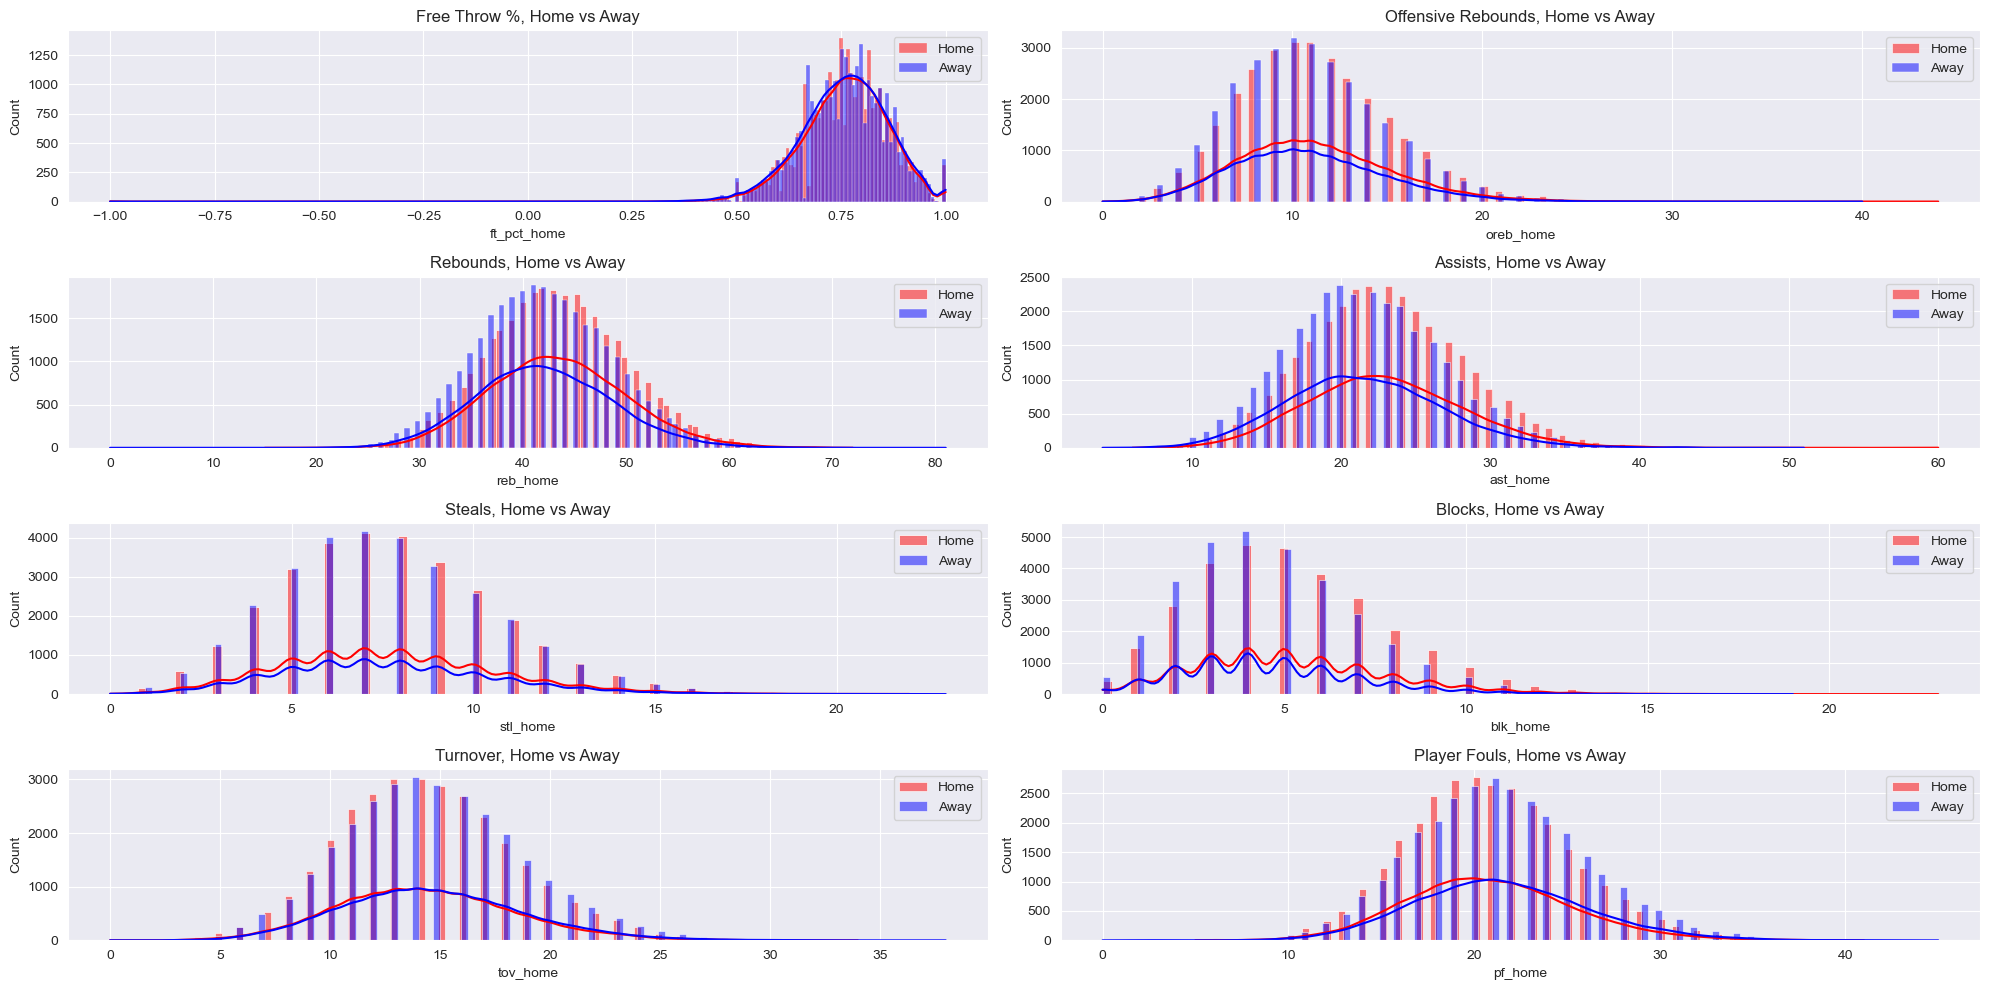

<Figure size 640x480 with 0 Axes>

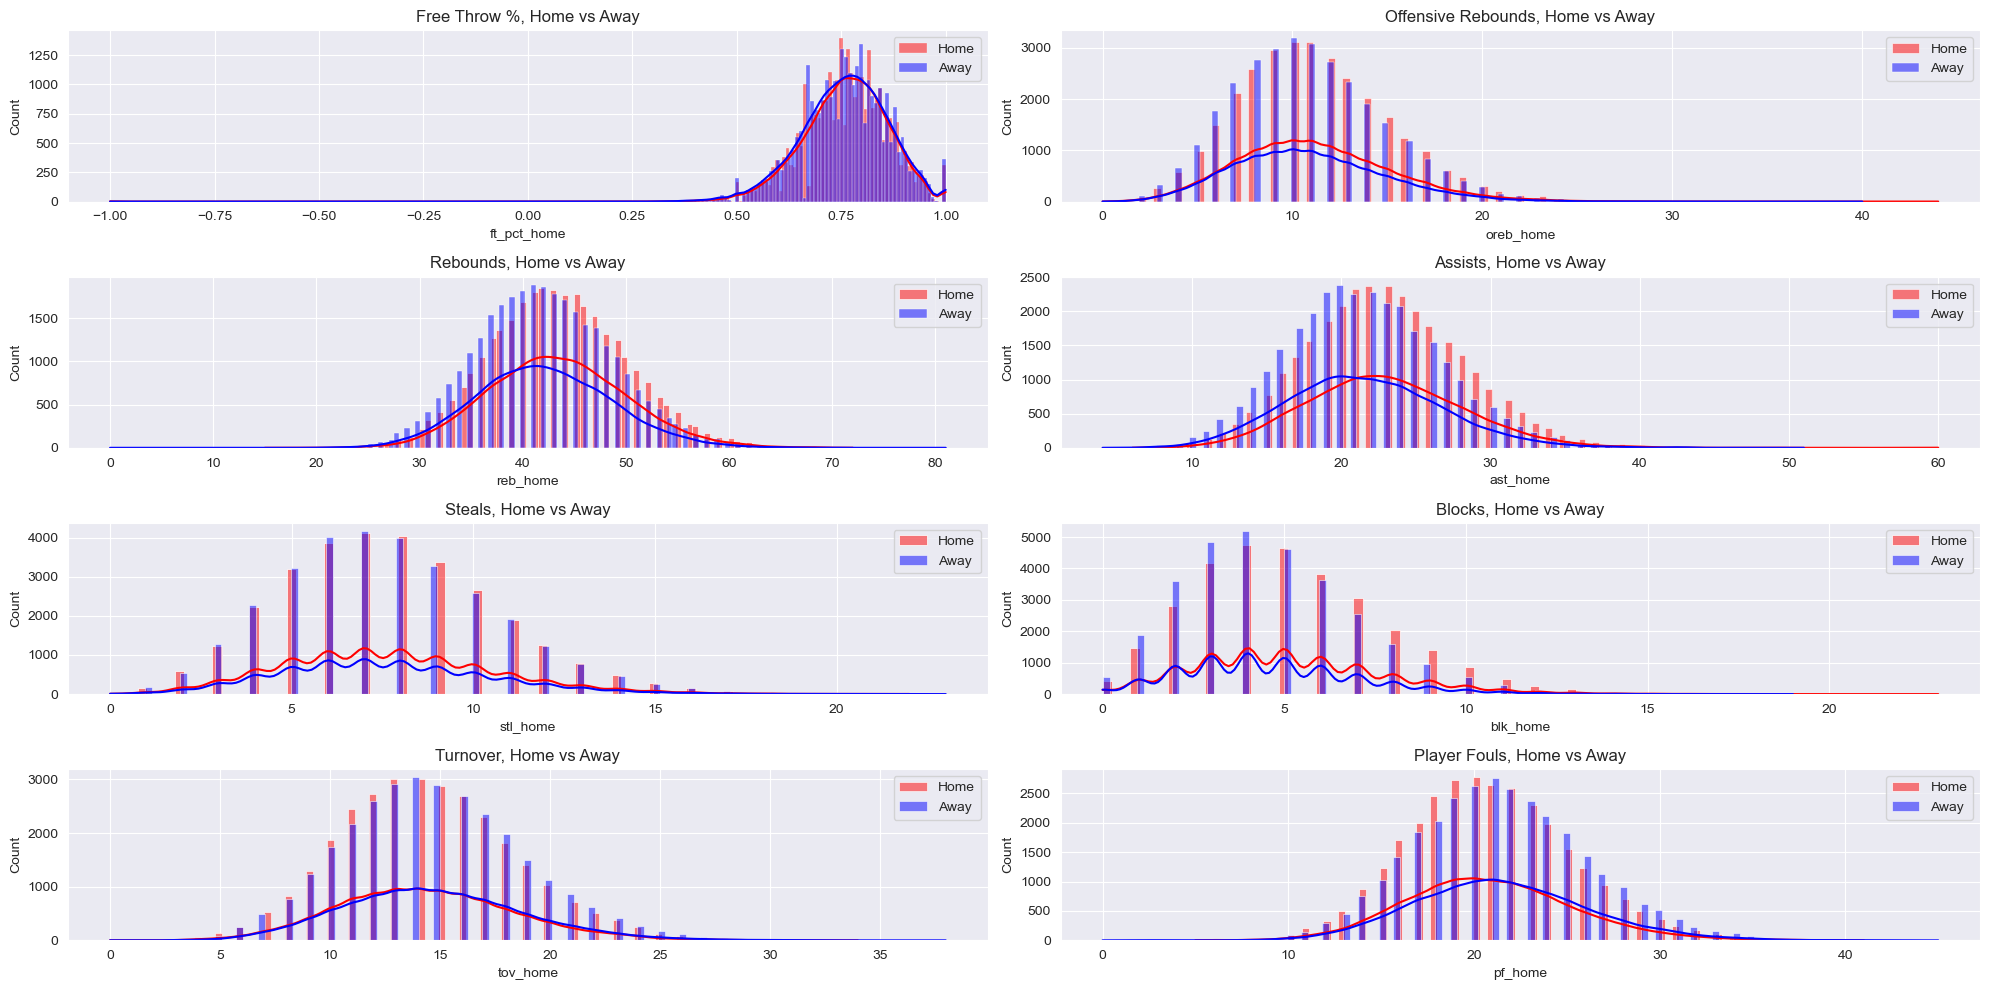

In [19]:
# define attributes
team_attributes = {"Free throw %": 'ft_pct', 
                   "Offensive Rebounds": 'oreb', 
                   "Rebounds": 'reb', 
                   "Assists": 'ast', 
                   "Steals": 'stl', 
                   "Blocks": 'blk', 
                   "Turnover": 'tov', 
                   "Player Fouls": 'pf'}

# plot home vs away stats
plot_team_values(df_team_data, attributes=team_attributes, nrows=4, ncols=2)

/var/folders/_j/g4pw0jf17gq2w8c26hbhq5l80000gn/T/ipykernel_34159/3963575357.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=np.arange(0,27,1), rotation=45, ha='right')
/var/folders/_j/g4pw0jf17gq2w8c26hbhq5l80000gn/T/ipykernel_34159/3963575357.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=np.arange(0,27,1), rotation=45, ha='right')


<Figure size 640x480 with 0 Axes>

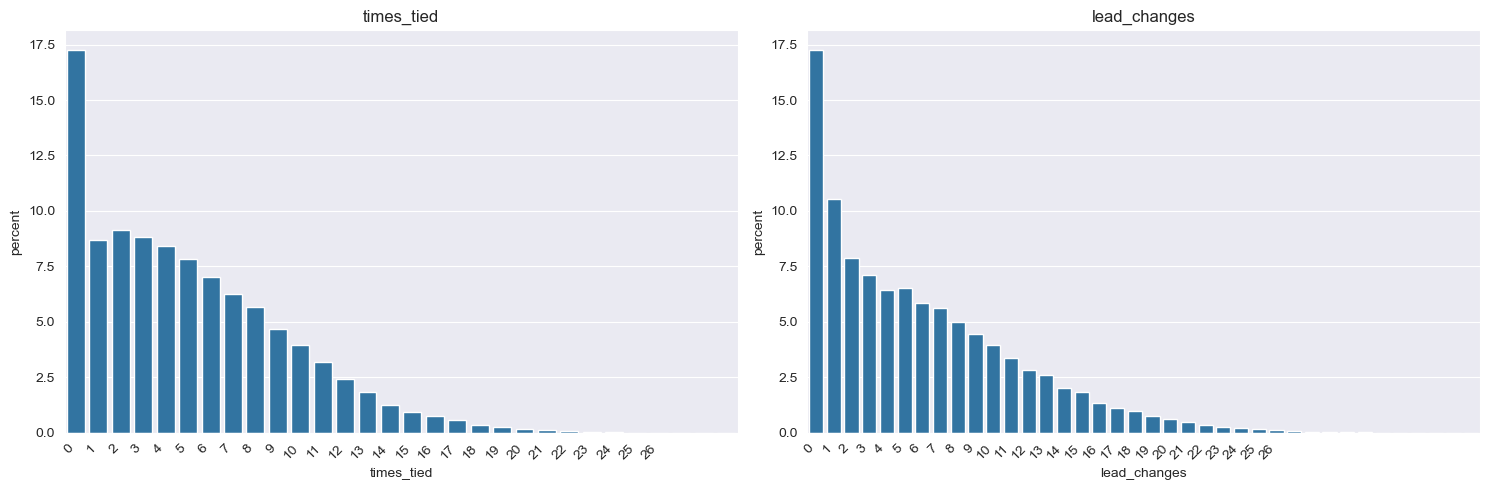

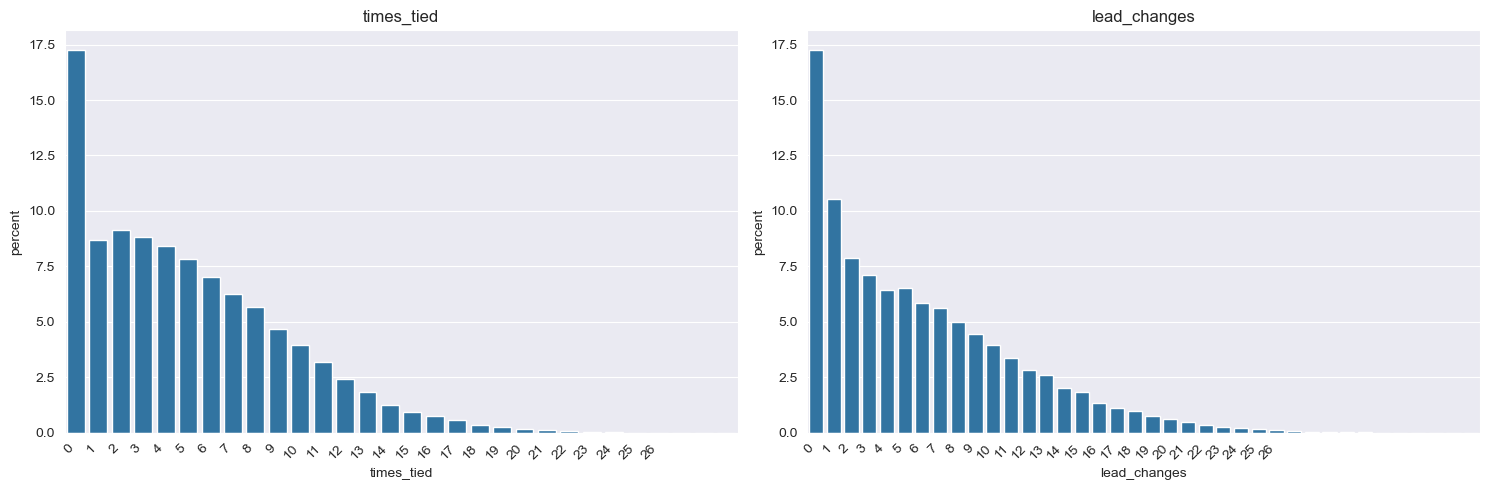

In [20]:
# Plot game stats
plot_competitve_performance(df_team_data)

# Conclusions
* Approximately 25% of games are runaways
* Home teams slightly perform better than visiting teams

# 4. Exploring Performance by Season

There are apparent differences in performance between Home and Away team. Below, I explore this further by diving into `season_type`.

In [21]:
def plot_team_values_by_season(df, attributes, nrows:int=1, ncols:int=1):
    '''
    :param df: the dataframe to plot 
    :param columns: the columns seeking to plot between home and away teams
    :param attributes: a dictionary of labels and attribute suffixes
    :param nrows, ncols: the plot dimensions
    :return: a pyplot object with all values.
    '''

    # Define season types
    seasons = ["Regular Season", "Playoffs", "Pre Season", "All Star"]
    # Define plot object
    plt.clf()
    fig, axes = plt.subplots(len(seasons)*nrows, ncols, figsize=(5*nrows, 5*ncols*len(seasons)))

    # Loop through plots and attributes
    for i, season in enumerate(seasons):
        for j, (attr_name, attr) in enumerate(attributes.items()):
            ax = axes[i*nrows+j//ncols, j%ncols]
            home_col_name = f'{attr}_home'
            away_col_name = f'{attr}_away'
            df_season = df[df['season_type'] == season]
            sns.histplot(data=df_season, x=home_col_name, kde=True, color="Red", ax=ax, label='Home' if i+j == 0 else "")
            sns.histplot(data=df_season, x=away_col_name, kde=True, color="Blue", ax=ax, label='Away' if i+j == 0 else "")
            ax.set_title(f'{season}: {attr_name}')
            if i+j == 0: ax.legend()
    plt.tight_layout()
    return fig

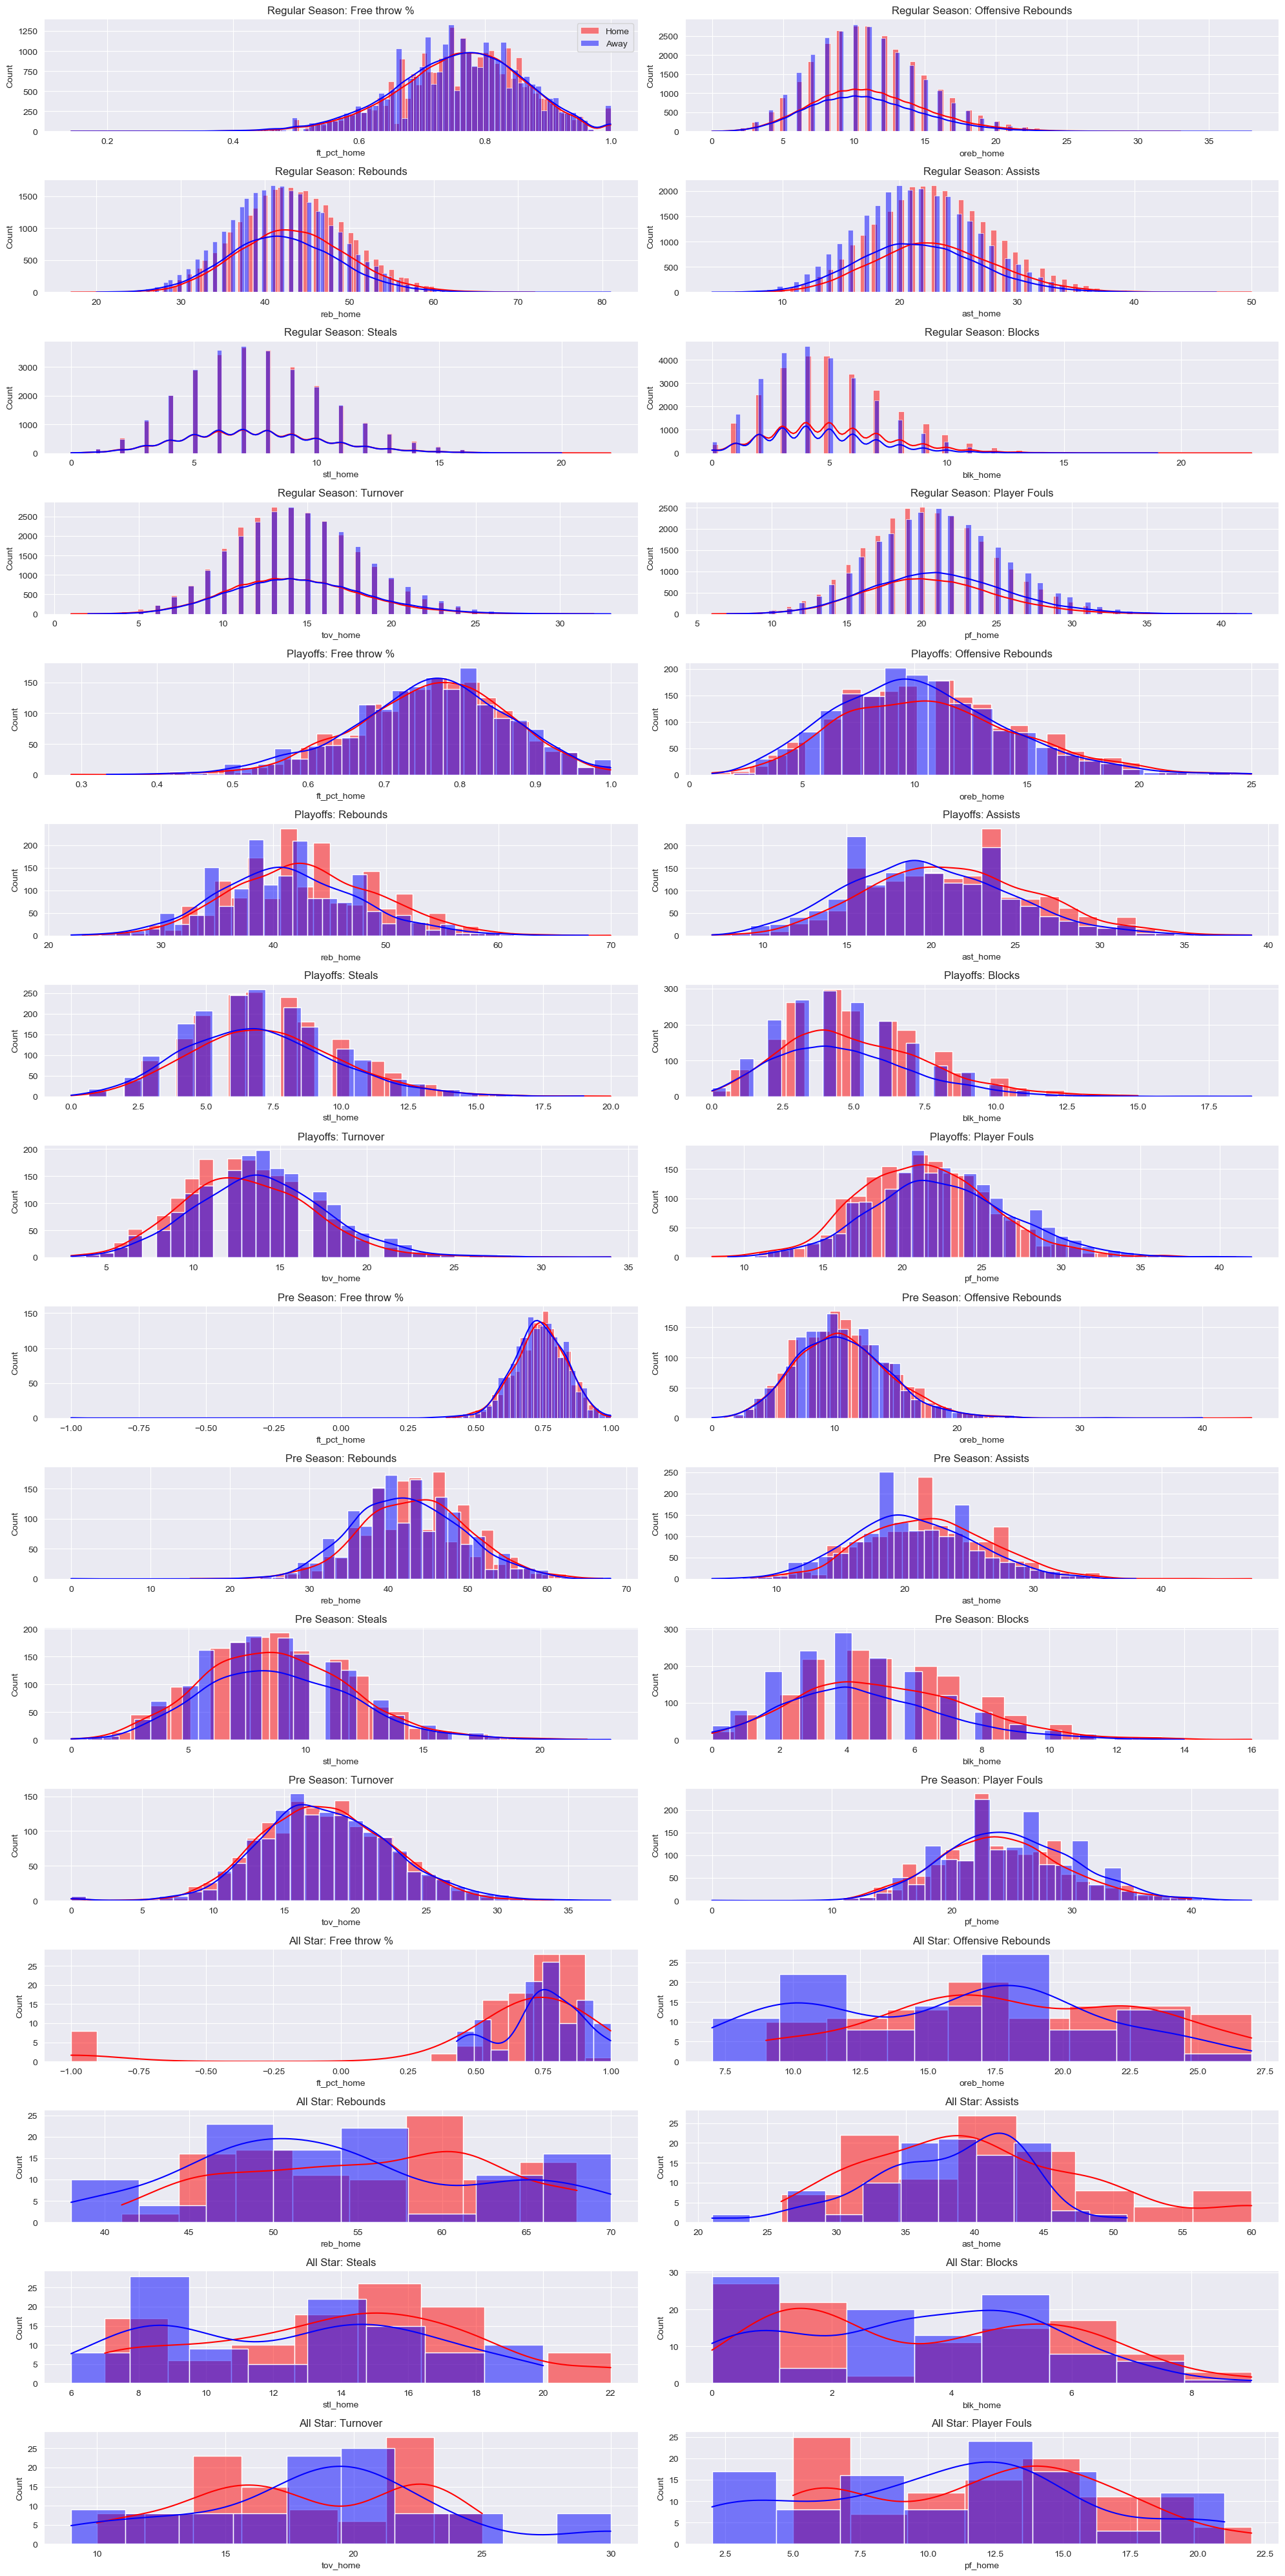

<Figure size 640x480 with 0 Axes>

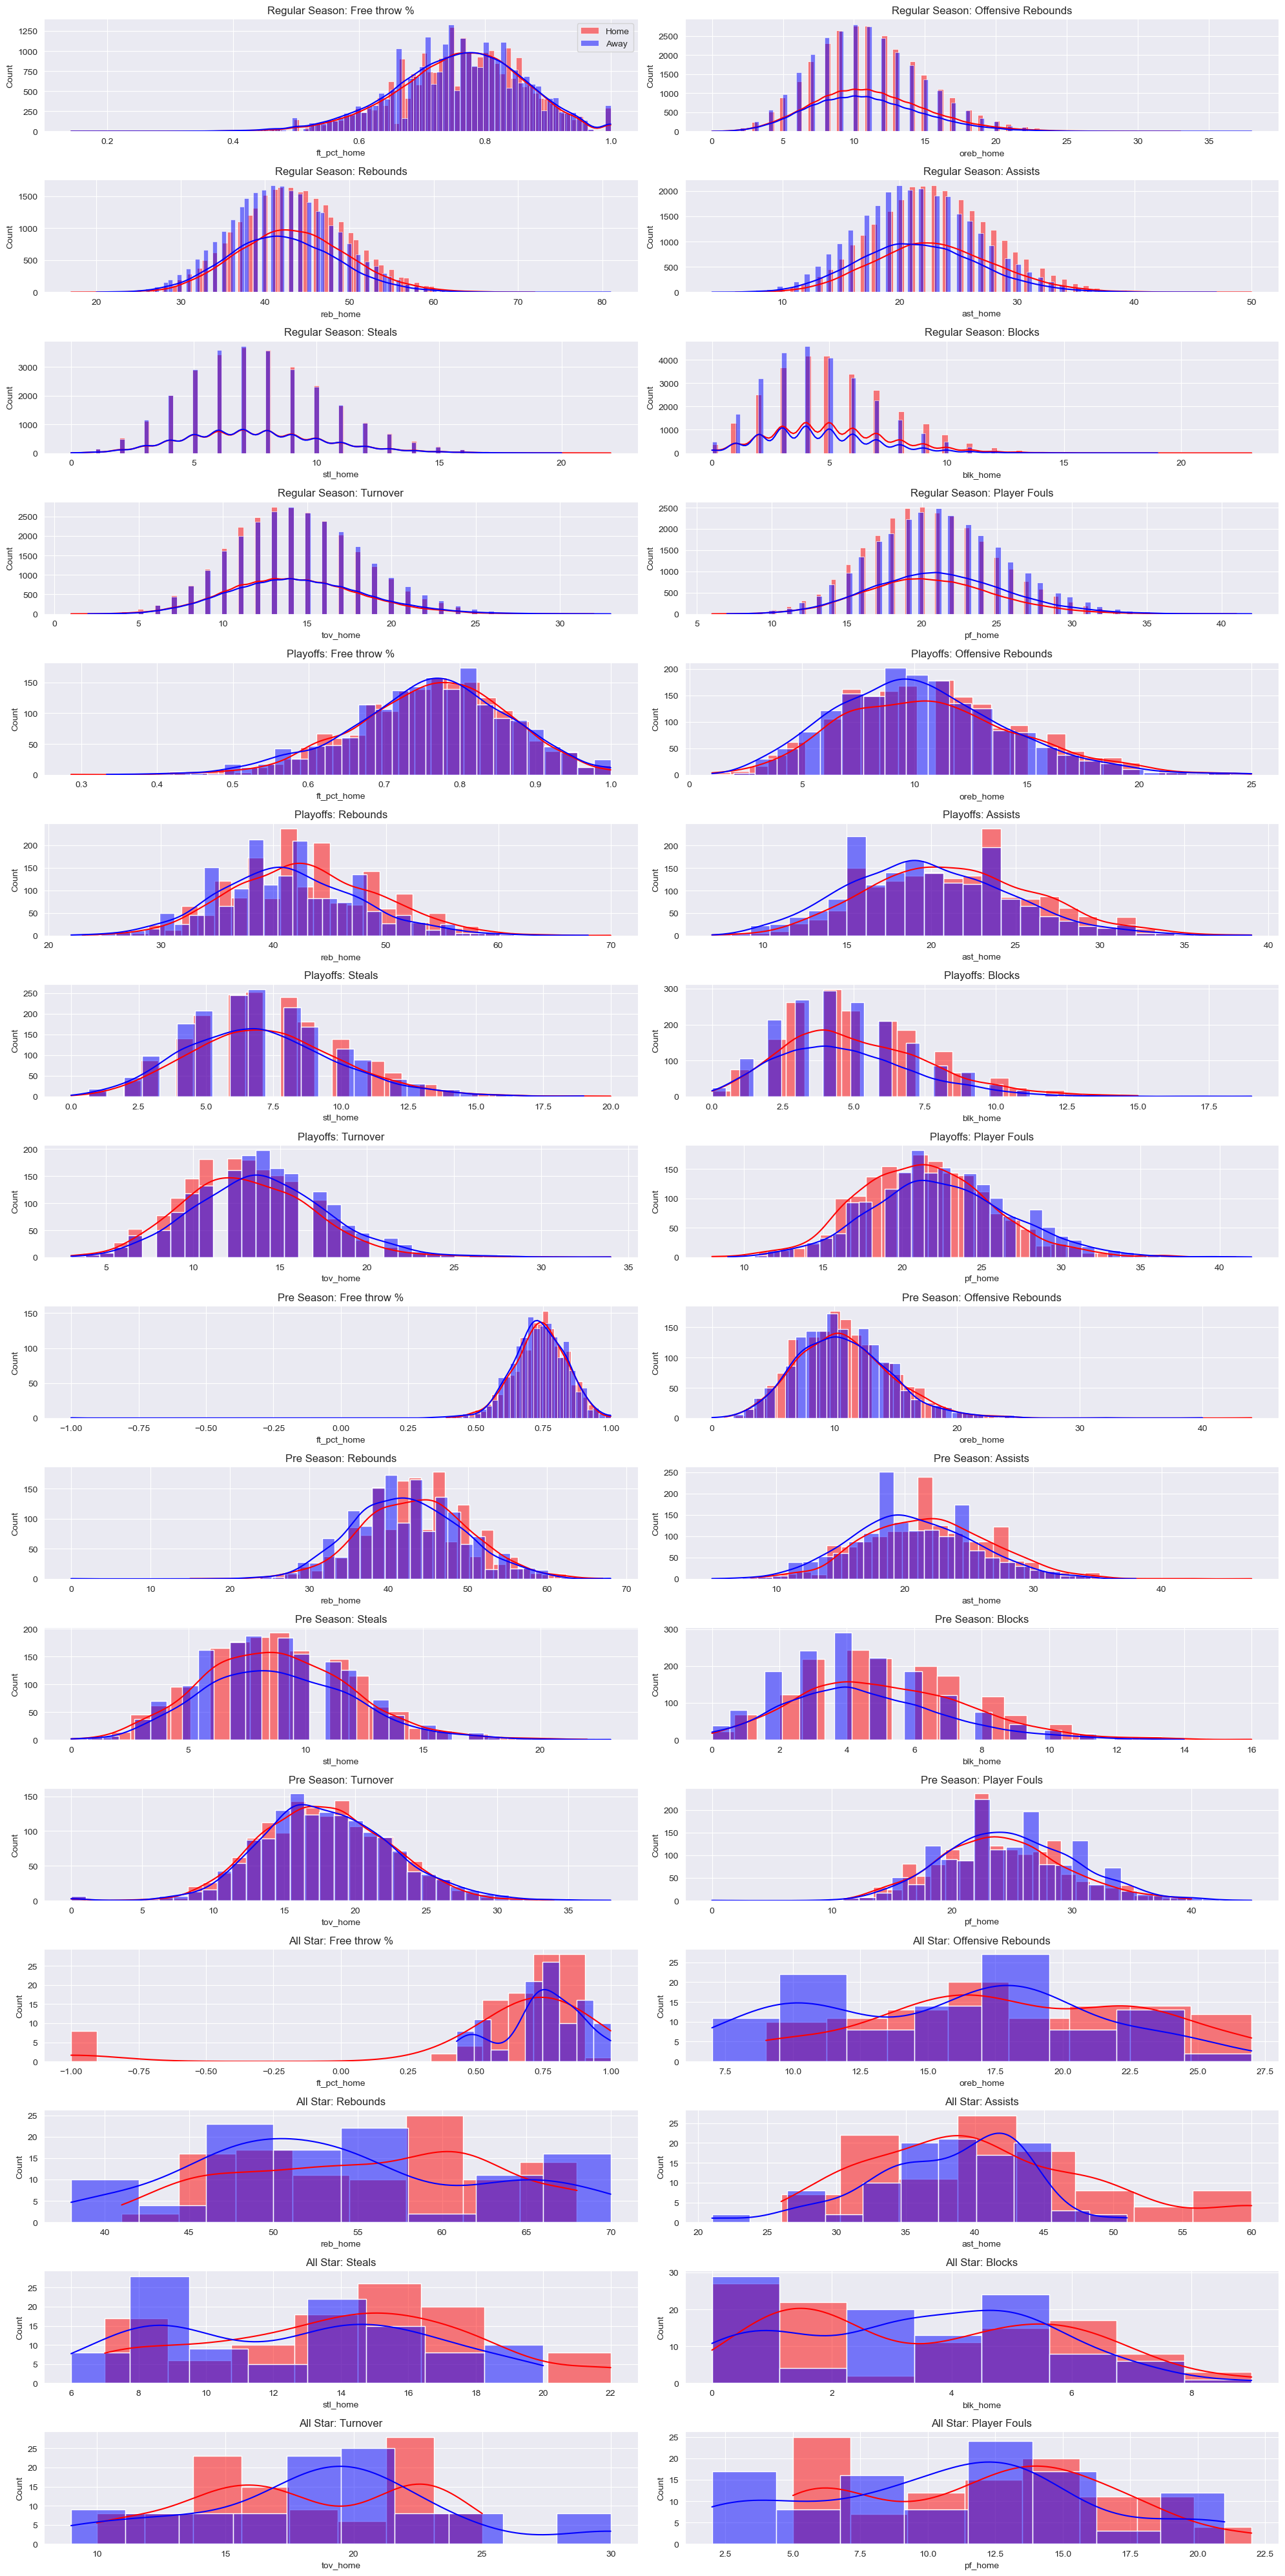

In [22]:
plot_team_values_by_season(df_team_data, team_attributes, 4, 2)

# Conclusions 

Aside from All Star games, home teams typically perform better by having more free throws, offensive rebounds, rebounds, assists, steals and blocks, with lower turnovers and fouls. 

This is less apparent with all-star games, where there is no apparent pattern in these performance metrics. This may be attributed to the team's skill or lack of data in this game category. Of the 32488 datapoints, only about 100 are All Star Games.

With this preliminary exploration, I suspect there may be more meaningful relationships when aggregating by specific team performance metrics.

# 5. Assessing team performance using aggregate analysis 

Exploring performance further, I wanted to assess the performance of each individual team by calculating the sum of a given teams scores/ divided by games overall.



In [24]:
# Divide table into home teams and away teams
home_columns = ['#', 'season_id', 'game_id', 'game_date', 'team_id_home', 'team_name_home', 
                'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home','reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home', 
                'pf_home', 'season_type', 'pts_home', 'pts_away', 
                'month', 'year', 'quarter']

away_columns = ['#', 'season_id', 'game_id', 'game_date', 'team_id_away', 'team_name_away', 
                'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away',
                'pf_away', 'season_type', 'pts_home', 'pts_away', 
                'month', 'year', 'quarter']

df_home_data = df_team_data[home_columns]
df_away_data = df_team_data[away_columns]

In [133]:
# Define function that aggregates home and away teams separately, aggregates by team name then rejoins to compare performance when home and away.
def aggregate_teams(home_df, away_df, by='mean'):
    '''
    This function splits and rejoins a dataframe by their team name. The goal is to return a dataframe with its mean 
    :param df: Dataframe to perform groupby on
    :param by: the metric to perform groupby with 
    :return: single dataframe with teams and their home/away metrics
    '''
    # Create groupby objects
    df_home_data_agg = home_df.groupby(['team_name_home']).agg({'ftm_home': by,
                                                                         'fta_home': by,
                                                                         'ft_pct_home': by,
                                                                         'oreb_home': by,
                                                                         'reb_home': by,
                                                                         'ast_home': by,
                                                                         'stl_home': by,
                                                                         'blk_home': by,
                                                                         'tov_home': by,
                                                                         'pf_home': by}).reset_index()
    df_away_data_agg = away_df.groupby(['team_name_away']).agg({'ftm_away': by,
                                                               'fta_away': by,
                                                               'ft_pct_away': by,
                                                               'oreb_away': by,
                                                               'reb_away': by,
                                                               'ast_away': by,
                                                               'stl_away': by,
                                                               'blk_away': by,
                                                               'tov_away': by,
                                                               'pf_away': by}).reset_index()
    # Rename columns to merge
    df_home_data_agg.rename(columns={'team_name_home': "team_name"}, inplace=True)
    df_away_data_agg.rename(columns={'team_name_away': "team_name"}, inplace=True)
    # Inner join
    team_metrics = pd.merge(left=df_home_data_agg, right=df_away_data_agg, how="inner", on='team_name')
    return team_metrics

In [135]:
df_team_metrics = aggregate_teams(df_home_data, df_away_data)
df_team_metrics

,team_name,ftm_home,fta_home,ft_pct_home,oreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,...,ftm_away,fta_away,ft_pct_away,oreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away
0,Atlanta Hawks,18.545545,24.016832,0.772806,10.976238,42.791089,23.253465,7.593069,4.767327,14.537624,...,17.595517,23.005848,0.764512,10.682261,41.522417,21.032164,7.611111,4.839181,15.260234,20.918129
1,Barcelona Regal FC,23.500000,28.500000,0.820500,10.000000,45.000000,25.500000,6.500000,5.500000,19.500000,...,11.000000,13.000000,0.846000,12.000000,37.000000,29.000000,8.000000,3.000000,27.000000,27.000000
2,Boston Celtics,18.330876,23.741935,0.774461,10.366820,42.816590,23.496774,8.130876,4.799078,14.679263,...,18.435185,23.930556,0.771863,9.995370,41.446296,21.718519,8.006481,4.495370,14.743519,22.588889
3,Brooklyn Nets,17.980088,23.477876,0.766920,9.827434,43.778761,23.371681,7.163717,4.670354,14.949115,...,17.883669,23.203579,0.773461,9.568233,42.736018,23.024609,7.190157,4.664430,14.568233,20.693512
4,Charlotte Bobcats,19.810606,26.866162,0.737356,11.179293,40.964646,21.601010,7.507576,5.770202,14.444444,...,17.773869,24.301508,0.728116,10.824121,39.997487,20.492462,7.655779,4.314070,15.216080,21.706030
5,Charlotte Hornets,18.579918,24.422131,0.759826,10.522541,44.456967,24.127049,7.194672,5.586066,13.483607,...,18.218876,23.849398,0.766122,10.622490,43.660643,22.353414,7.642570,4.518072,13.317269,19.148594
6,Chicago Bulls,17.928361,23.613346,0.760817,11.679097,44.569185,23.294406,7.428852,5.335623,14.602552,...,17.278507,22.819374,0.757503,10.827447,42.528759,21.424823,7.336024,4.580222,15.414733,21.483350
7,Cleveland Cavaliers,18.405561,24.543624,0.750678,11.545542,43.878236,23.178332,7.194631,5.103547,14.581016,...,17.980296,24.165517,0.744465,11.037438,42.072906,20.353695,7.196059,4.119212,14.707389,20.976355
8,Dallas Mavericks,19.160542,24.379110,0.785408,10.882979,43.392650,22.166344,7.393617,4.965184,13.053191,...,17.466346,22.202885,0.787174,9.905769,41.347115,21.592308,7.142308,4.487500,13.111538,20.950962
9,Denver Nuggets,20.150794,26.854167,0.751179,11.618056,44.603175,25.602183,7.820437,5.745040,14.495040,...,18.456376,24.436242,0.756349,11.491850,42.591563,22.142857,8.005753,4.542665,15.311601,21.759348


In [136]:
# Define function to take difference between home and away categories and another to plot differences
def take_differences_stats(df):
    team_attributes = {"Free throws made": 'ftm',
                       "Free throws attempts": 'fta',
                       "Offensive Rebounds": 'oreb',
                       "Rebounds": 'reb',
                       "Assists": 'ast',
                       "Steals": 'stl',
                       "Blocks": 'blk',
                       "Turnover": 'tov',
                       "Player Fouls": 'pf'}
    results_df = pd.DataFrame()
    for _, v in team_attributes.items():
        home_stat = f'{v}_home'
        away_stat = f'{v}_away'
        results_df[v] = df[home_stat] - df[away_stat]
    results_df.index = df['team_name']
    return results_df

# Calculate difference in stats
df_team_stat_comparison_pre = take_differences_stats(df_team_metrics)
df_team_stat_comparison_pre

,ftm,fta,oreb,reb,ast,stl,blk,tov,pf
team_name,,,,,,,,,
Atlanta Hawks,0.950028,1.010984,0.293976,1.268672,2.221302,-0.018042,-0.071855,-0.722610,-0.166644
Barcelona Regal FC,12.500000,15.500000,-2.000000,8.000000,-3.500000,-1.500000,2.500000,-7.500000,6.000000
Boston Celtics,-0.104310,-0.188620,0.371450,1.370294,1.778256,0.124394,0.303708,-0.064256,-1.235893
Brooklyn Nets,0.096420,0.274297,0.259201,1.042743,0.347073,-0.026440,0.005924,0.380882,-0.279795
Charlotte Bobcats,2.036737,2.564654,0.355172,0.967159,1.108548,-0.148203,1.456132,-0.771636,-0.079768
Charlotte Hornets,0.361043,0.572734,-0.099949,0.796325,1.773636,-0.447898,1.067993,0.166337,-0.130152
Chicago Bulls,0.649855,0.793972,0.851650,2.040427,1.869583,0.092828,0.755401,-0.812181,-0.612889
Cleveland Cavaliers,0.425265,0.378107,0.508103,1.805329,2.824637,-0.001428,0.984336,-0.126373,-0.906364
Dallas Mavericks,1.694195,2.176226,0.977209,2.045535,0.574037,0.251309,0.477684,-0.058347,-0.401639


In [137]:
# Z-score normalization for plotting
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_team_stat_comparison = sc.fit_transform(df_team_stat_comparison_pre)

# Convert NumPy array back to dataframe
df_team_stat_comparison = pd.DataFrame(df_team_stat_comparison, index=df_team_stat_comparison_pre.index, columns=df_team_stat_comparison_pre.columns)

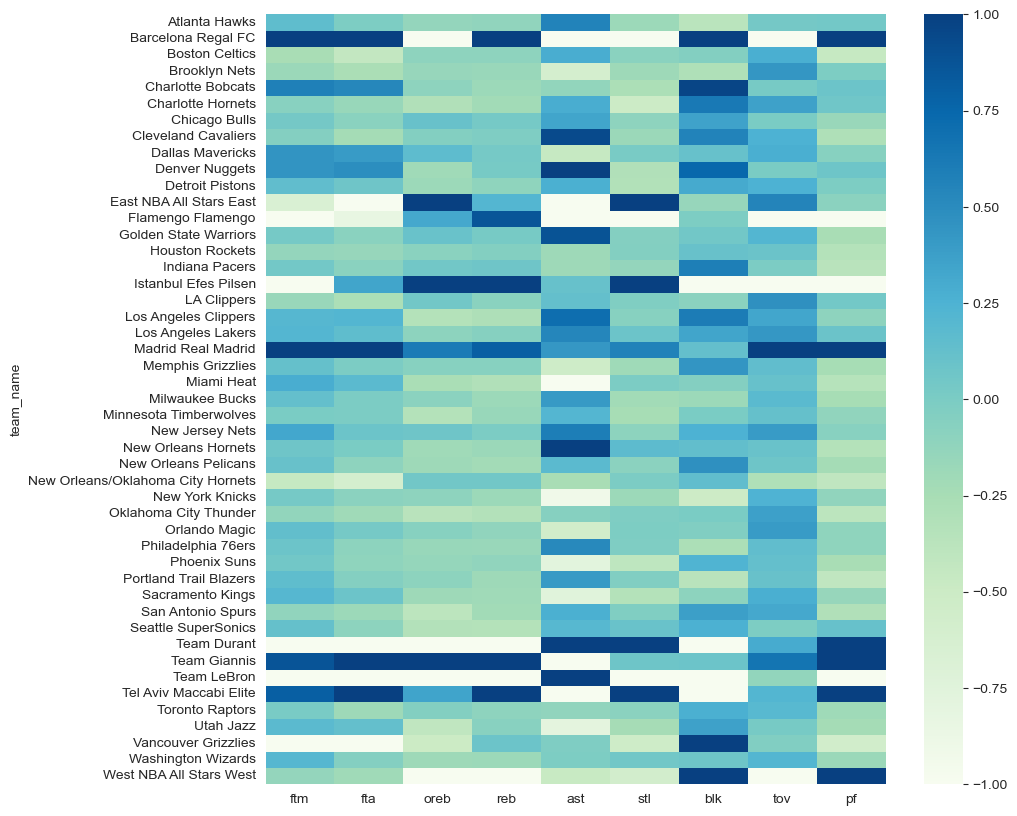

In [138]:
# Plot differences
ax = plt.figure(figsize=(10,10))
sns.heatmap(df_team_stat_comparison, vmin=-1, vmax=1, cmap='GnBu')
plt.show()

# Conclusion
Across all teams, home team generally seems to have a competitive advantage over the away team. This can be due boosts in confidence or morale when competing on home turf. In order to have a better understanding of how teams perform against each other, we can use machine learning to weigh each attribute and calculate the total offensive score and efficiency score. Given the limitations of this dataset, we cannot normalize scores with total shots attempted but we can penalize teams for personal fouls and turnovers.